 # Project 1 Machine learning
 ----
  
  University : UTEC \
  Course       : Machine Learning \
  Professor    : Cristian López Del Alamo \
  Topic        : Regression 
  
 ----

Names of the group members:
 - Integrante 1: Luis Enrique Cortijo Gonzales (100%)
 - Integrante 2: Jesús Miguel Egúsquiza Oré(100%)
 - Integrante 3: Lenin Gerardo Chavez Zapata(100%)
 - Integrante 4: Brayan Eduardo Gomero Castillo(100%)

 ----

In [49]:
import pandas as pd
import numpy as np
import random
import plotly.express as px
import seaborn as sns

# Colocar el path donde se encuentra los archivos train y test
path = './'
# Cargamos los datos, pero tenga en cuenta que se cargan como dataframes de python
df_train = pd.read_csv(path + 'train.csv')
df_test  = pd.read_csv(path + 'test.csv')

# Limpiamos la data de columnas más allá de MTO_PIA porque no nos interesan
MTO_PIA_index = df_train.columns.get_loc('MTO_PIA')


df_train.drop(df_train.iloc[:, MTO_PIA_index+1:], inplace=True, axis=1)
df_test.drop(df_test.iloc[:, MTO_PIA_index:], inplace=True, axis=1) # A ESTE NO SE LE SUMA + 1 PQ NO TIENE A MTO_PIA

Y = df_train["MTO_PIA"]
X = df_train.drop(["MTO_PIA"],axis=1)


Y.tail()




1459    12779
1460      180
1461    31447
1462     2250
1463     5569
Name: MTO_PIA, dtype: int64

## 1.1 Make sure it's all numerical


In [50]:
# Turn categories into numbers
from pandas.api.types import is_string_dtype

# First clean the df of columns with 1 unique_value

columns_to_clean = []

for i in range(X.shape[1]):
    if(X[X.columns[i]].nunique() == 1):
        columns_to_clean.append(X.columns[i])

#print(X[columns_to_clean].nunique()) #Those columns that don't contribute anything because their value is constant =D

X.drop(columns_to_clean, axis=1, inplace = True)
df_test.drop(columns_to_clean, axis=1, inplace = True)

print("Forma de los datos quitando los constantes: ", X.shape)
#print(df_test.shape)


columns_with_more_categories = []

for i in range(X.shape[1]):
    if(is_string_dtype(X[X.columns[i]])):
        if(X[X.columns[i]].nunique() != df_test[df_test.columns[i]].nunique()):
            columns_with_more_categories.append(X.columns[i])
            
print("cantidad de cols con dif categorias entre db: ",len(columns_with_more_categories))
#print(columns_with_more_categories) # Aquellas columnas con diferente numero de categorias en el test y en el train
# Esas columnas no serian utiles porque luego cuando se encuentren con un valor distinto no van a predecir bien

X.drop(columns_with_more_categories, axis=1, inplace = True)
df_test.drop(columns_with_more_categories, axis=1, inplace = True)

print("Forma de los datos quitando las columnas con diferentes categorias: ", X.shape)
columns_categorical = []
columns_notcategorical = []

for i in range(X.shape[1]):
    if(is_string_dtype(X[X.columns[i]])):
        columns_categorical.append(X.columns[i])
    else:
        columns_notcategorical.append(X.columns[i])

print("cantidad de cols categoricas: ", len(columns_categorical))
print("cantidad de cols no categoricas: ", len(columns_notcategorical))

X_dummies = pd.get_dummies(X[columns_categorical]).astype(int)
df_test_dummies = pd.get_dummies(df_test[columns_categorical]).astype(int)

df_X_train = pd.concat([X_dummies, X[columns_notcategorical]],axis = 1)
df_X_test = pd.concat([df_test_dummies, df_test[columns_notcategorical]],axis = 1)

print( "cantidad de nans en df_X_train: \n", df_X_train.isna().sum())
print( "cantidad de nans en df_X_test: \n", df_X_test.isna().sum())

print(df_X_train.shape)
print(Y.shape)


Forma de los datos quitando los constantes:  (1464, 23)
cantidad de cols con dif categorias entre db:  15
Forma de los datos quitando las columnas con diferentes categorias:  (1464, 8)
cantidad de cols categoricas:  3
cantidad de cols no categoricas:  5
cantidad de nans en df_X_train: 
 TIPO_PROD_PROY_2.PROYECTO                     0
TIPO_PROD_PROY_3.PRODUCTO                     0
TIPO_ACT_OBRA_ACCINV_5.ACTIVIDAD              0
TIPO_ACT_OBRA_ACCINV_6.ACCION DE INVERSION    0
CATEGORIA_GASTO_5.GASTOS CORRIENTES           0
CATEGORIA_GASTO_6.GASTOS DE CAPITAL           0
META                                          0
CANT_META_SEM                                 0
AVAN_FISICO_SEM                               0
SEC_FUNC                                      0
UBIGEO                                        0
dtype: int64
cantidad de nans en df_X_test: 
 TIPO_PROD_PROY_2.PROYECTO                     0
TIPO_PROD_PROY_3.PRODUCTO                     0
TIPO_ACT_OBRA_ACCINV_5.ACTIVIDAD          

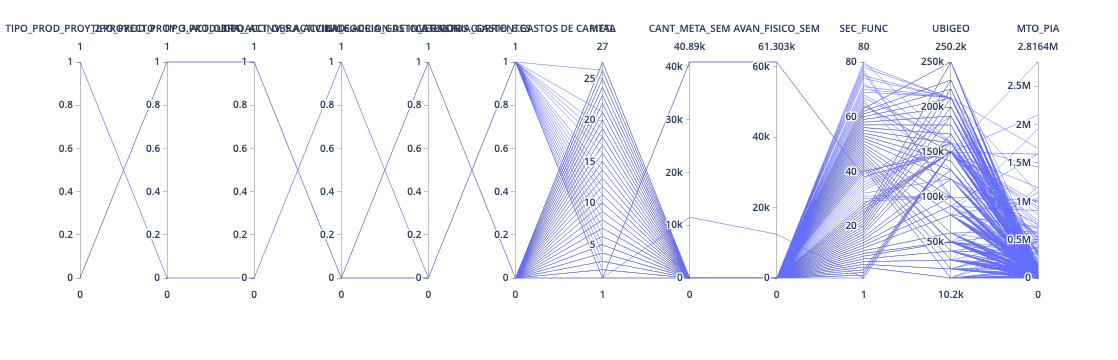

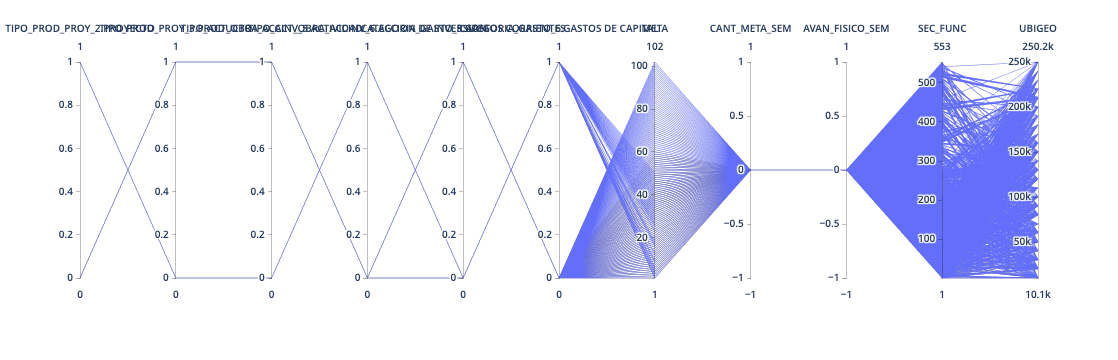

cantidad de nans en df_X_train: 
 TIPO_PROD_PROY_2.PROYECTO                     0
TIPO_PROD_PROY_3.PRODUCTO                     0
TIPO_ACT_OBRA_ACCINV_5.ACTIVIDAD              0
TIPO_ACT_OBRA_ACCINV_6.ACCION DE INVERSION    0
CATEGORIA_GASTO_5.GASTOS CORRIENTES           0
CATEGORIA_GASTO_6.GASTOS DE CAPITAL           0
META                                          0
CANT_META_SEM                                 0
AVAN_FISICO_SEM                               0
SEC_FUNC                                      0
UBIGEO                                        0
dtype: int64
cantidad de nans en df_X_test: 
 TIPO_PROD_PROY_2.PROYECTO                     0
TIPO_PROD_PROY_3.PRODUCTO                     0
TIPO_ACT_OBRA_ACCINV_5.ACTIVIDAD              0
TIPO_ACT_OBRA_ACCINV_6.ACCION DE INVERSION    0
CATEGORIA_GASTO_5.GASTOS CORRIENTES           0
CATEGORIA_GASTO_6.GASTOS DE CAPITAL           0
META                                          0
CANT_META_SEM                                 0
AVAN_FIS

In [51]:
#df_X_train["UBIGEO"] # PUEDE QUE SEA CATEGORICA, SINO FUNCA CAMBIARLO
Gastos_cap_index = df_X_train.columns.get_loc('CATEGORIA_GASTO_6.GASTOS DE CAPITAL')
#fig = px.parallel_coordinates(pd.concat([df_X_train.drop(df_X_train.iloc[:, :Gastos_cap_index], axis=1, inplace = False), Y]))
fig = px.parallel_coordinates(pd.concat([df_X_train, Y],axis=1))
fig.show()
df_X_train.nunique()
px.parallel_coordinates(df_X_test).show()
print( "cantidad de nans en df_X_train: \n", df_X_train.isna().sum())
print( "cantidad de nans en df_X_test: \n", df_X_test.isna().sum())

In [52]:
# toda la test data tiene a cant_meta_sem en 0 y a avan_fisico_SEM en 0 por lo que son variables no relevantes en nuestro estudio
df_X_train.drop(["CANT_META_SEM","AVAN_FISICO_SEM"], axis=1, inplace = True)
df_X_test.drop(["CANT_META_SEM","AVAN_FISICO_SEM"], axis=1, inplace = True)

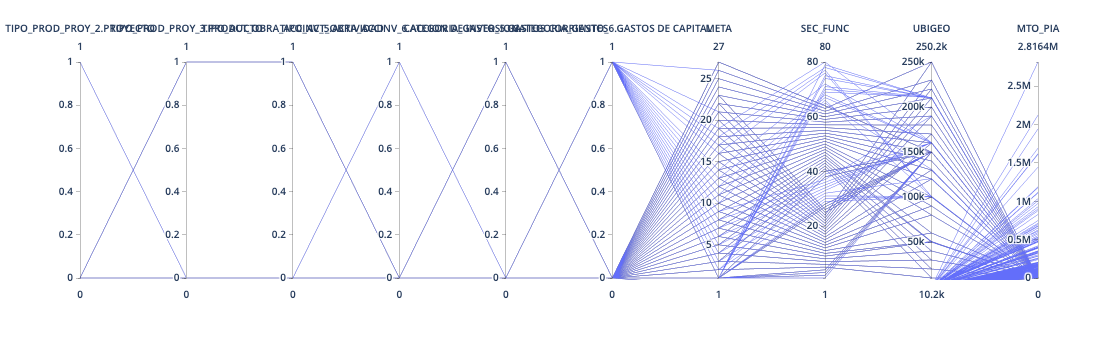

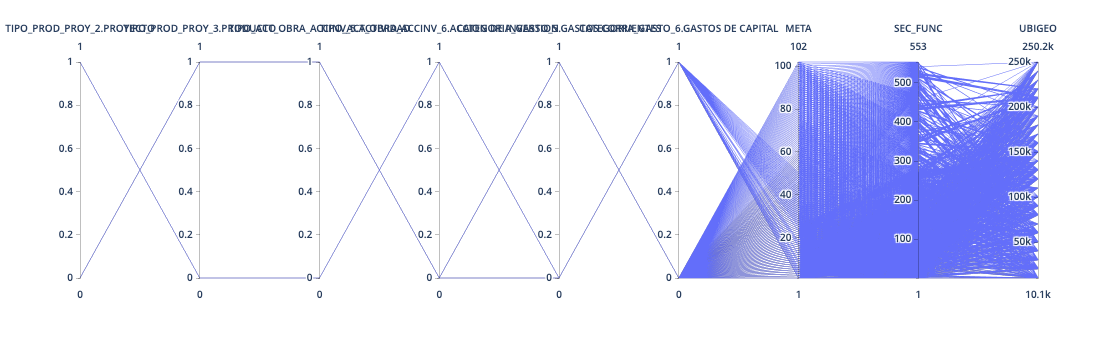

TIPO_PROD_PROY_2.PROYECTO                     int64
TIPO_PROD_PROY_3.PRODUCTO                     int64
TIPO_ACT_OBRA_ACCINV_5.ACTIVIDAD              int64
TIPO_ACT_OBRA_ACCINV_6.ACCION DE INVERSION    int64
CATEGORIA_GASTO_5.GASTOS CORRIENTES           int64
CATEGORIA_GASTO_6.GASTOS DE CAPITAL           int64
META                                          int64
SEC_FUNC                                      int64
UBIGEO                                        int64
dtype: object


In [53]:
fig = px.parallel_coordinates(pd.concat([df_X_train, Y]))
fig.show()
df_X_train.nunique()
px.parallel_coordinates(df_X_test).show()
print(df_X_test.dtypes)

In [54]:
# Trabajaremos con dichas variables para el modelo de regresion no lineal
# no lineal debido a que no tienen un comporamiento lineal claro
# comenzaremos probando en modelos de librerias ya hechas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_complete = pd.concat([df_X_train, Y], axis = 1)
df_X_train_norm = scaler.fit_transform(df_X_train) 
df_X_test_norm = scaler.fit_transform(df_X_test)

Y_norm = scaler.fit_transform(Y.to_numpy().reshape(-1,1))
xTrain, xValid, yTrain , yValid = train_test_split(df_X_train_norm ,Y_norm,test_size = 0.2)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
#poly_features = PolynomialFeatures(degree = 1, include_bias = False)
#X_poly = poly_features.fit_transform(xTrain)

reg = LinearRegression()
reg.fit(xTrain,yTrain)

#x_vals = poly_features.fit_transform(xValid)
y_predic = reg.predict(xValid)

print(mean_absolute_error(yValid, y_predic))

y_test = reg.predict(poly_features.fit_transform(df_X_test_norm))
y_dnorm = y_test * (max(Y) - min(Y)) - min(Y)
np.savetxt("foo.csv", y_dnorm, delimiter=",")
print(y_dnorm)

0.026746651856199323
[[57757.64941406]
 [49506.55664062]
 [53632.10302734]
 ...
 [59132.83154297]
 [59132.83154297]
 [44005.828125  ]]


In [77]:
# Clase de regresión lineal
class Regresion:
    def __init__(self, dim):
        self.dim = dim
        self.m_W = np.random.rand(dim)
        self.m_W  = self.m_W.reshape(-1, 1)
        self.m_b = np.random.random()

    def H(self, X):
        return np.dot(X, self.m_W) + self.m_b

    def Loss(self, X, Y):
        y_pred = self.H(X)
        return (np.linalg.norm((Y - y_pred))**2)/(2*len(Y)), y_pred
    def Loss_L2(self, X, Y, lambda_):
        y_pred = self.H(X)
        return (np.linalg.norm((Y - y_pred))**2)/(2*len(Y)), y_pred + lambda_*np.linalg.norm(self.m_W, 2)

    def Loss_L1(self, X, Y, lambda_):
        y_pred = self.H(X)
        return (np.linalg.norm((Y - y_pred))**2) / (2 * len(Y)), y_pred + lambda_ * np.linalg.norm(self.m_W, 1)

    def dL(self, X, Y, Y_pre):
        error = Y - Y_pre
        dw = -np.dot(X.T, error)/len(Y)
        db = np.sum((error)*(-1))/len(Y)
        return dw, db

    def change_params(self, dw, db, alpha):
        self.m_W = self.m_W - alpha*dw
        self.m_b = self.m_b - alpha*db

    def train(self, X, Y, alpha, epochs, _lambda, reg=""):
        error_list = []
        time_stamp = []
        for i in range(epochs):
            if reg == "L2":
                loss, y_pred = self.Loss_L2(X, Y, _lambda)
            elif reg == "L1":
                loss, y_pred = self.Loss_L1(X, Y, _lambda)
            else:
                loss, y_pred = self.Loss(X, Y)
            time_stamp.append(i)
            error_list.append(loss)
            dw, db = self.dL(X, Y, y_pred)
            self.change_params(dw, db, alpha)
            # print("error de pérdida : " + str(loss))
            if (i % 1000 == 0):
                print("error de pérdida : " + str(loss))
                #    self.plot_error(time_stamp, error_list)
                # self.plot_plane(X[:, 0], X[:, 1], Y)

        return time_stamp, error_list

    def plot_error(self, time, loss):
        ptl.plot(time, loss)
        ptl.show()

    def plot_line(self, x, y_pre):
        ptl.plot(x, y_pre, '*')
        ptl.plot(x, self.H(x))
        ptl.show()

In [86]:
reg_by_us = Regresion(dim = xTrain.shape[1])
time_stamp, error_list = reg_by_us.train(xTrain, yTrain, 0.002, 10000, 0)
y_predic_g4 = reg_by_us.H(df_X_test_norm)
y_predic_g4_dnorm = y_predic_g4 * (max(Y) - min(Y)) - min(Y)
np.savetxt("y_test.csv", y_predic_g4_dnorm, delimiter=",")


result_csv = pd.DataFrame(y_predic_g4_dnorm)
result_csv = result_csv.reset_index()
result_csv['index'] += 1

result_csv.rename(columns={'index': 'ID', 0: 'MTO_PIA'}, inplace=True)

result_csv.to_csv('results.csv', index=False)

print(y_predic_g4_dnorm)

error de pérdida : 3.8886088129751735
error de pérdida : 0.02093169078917061
error de pérdida : 0.01688779980702617
error de pérdida : 0.01398195642842648
error de pérdida : 0.01181180461855946
error de pérdida : 0.010136344924933873
error de pérdida : 0.00880761643263442
error de pérdida : 0.007731917419948032
error de pérdida : 0.006847685956874029
error de pérdida : 0.006112803197700401
[[283092.28036417]
 [251338.84648323]
 [266990.96497475]
 ...
 [288439.59174206]
 [288439.59174206]
 [229985.60465577]]
